# **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from matplotlib.colors import ListedColormap

# **Decision Tree**

In [ ]:
def entropy(y):

  hist = np.bincount(y)
  ps = hist / len(y)
  return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:

  def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):

    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

  def is_leaf_node(self):

    return self.value is not None


class DecisionTree:

  def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.root = None

  def fit(self, X, y):
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    self.root = self._grow_tree(X, y)

  def predict(self, X):
    return np.array([self._traverse_tree(x, self.root) for x in X])

  def _grow_tree(self, X, y, depth=0):
    n_samples, n_features = X.shape
    n_labels = len(np.unique(y))

    if (depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split):
        leaf_value = self._most_common_label(y)
        return Node(value=leaf_value)

    feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

    best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
    
    left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
    left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
    right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
    return Node(best_feat, best_thresh, left, right)

  def _best_criteria(self, X, y, feat_idxs):
    best_gain = -1
    split_idx, split_thresh = None, None
    for feat_idx in feat_idxs:
        X_column = X[:, feat_idx]
        thresholds = np.unique(X_column)
        for threshold in thresholds:
            gain = self._information_gain(y, X_column, threshold)

            if gain > best_gain:
                best_gain = gain
                split_idx = feat_idx
                split_thresh = threshold

    return split_idx, split_thresh

  def _information_gain(self, y, X_column, split_thresh):

    parent_entropy = entropy(y)

    left_idxs, right_idxs = self._split(X_column, split_thresh)

    if len(left_idxs) == 0 or len(right_idxs) == 0:
        return 0

    n = len(y)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
    child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

    ig = parent_entropy - child_entropy
    return ig

  def _split(self, X_column, split_thresh):
    left_idxs = np.argwhere(X_column <= split_thresh).flatten()
    right_idxs = np.argwhere(X_column > split_thresh).flatten()
    return left_idxs, right_idxs

  def _traverse_tree(self, x, node):
    if node.is_leaf_node():
        return node.value

    if x[node.feature] <= node.threshold:
        return self._traverse_tree(x, node.left)
    return self._traverse_tree(x, node.right)

  def _most_common_label(self, y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

In [ ]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

# **Loading Dataset**

In [ ]:
df = files.upload()
df = pd.read_excel('Social_Network_Ads.xlsx')
df.head()

Saving Social_Network_Ads.xlsx to Social_Network_Ads.xlsx


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# **Data Preprocessing**

In [ ]:
df.isnull().sum()

User ID             0
Gender              0
Age                 0
EstimatedSalary     0
Purchased           0
dtype: int64

In [ ]:
df.columns

Index(['User ID ', 'Gender ', 'Age ', 'EstimatedSalary ', 'Purchased'], dtype='object')

In [ ]:
df.columns = ['User_ID', 'Gender', 'Age', 'Estimated_Salary', 'Purchased']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           400 non-null    int64 
 1   Gender            400 non-null    object
 2   Age               400 non-null    int64 
 3   Estimated_Salary  400 non-null    int64 
 4   Purchased         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#**Preparing for Model**

In [ ]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Implementing Decision Tree**

In [ ]:
classifier = DecisionTree(max_depth=7)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# **Model Evaluation**

In [ ]:
acc = accuracy(y_test, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.920


# **Graph**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


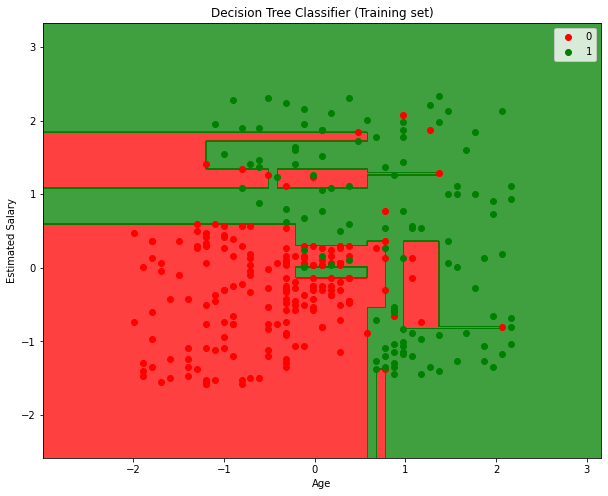

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
